
##CS286 Final exam
##Spring 2021
###Due: university-scheduled exam date of May 21 2021, 17:00pm (submission site stays open until 23:59pm)

You may work together with your project team, and submit one solution for all team members; you can also do the final on your own if you prefer. If you work in a team, all team members will get the same grade. Everyone on your team should contribute to the solution and understand the solution (not one person doing all the work). Oral examination may be requested.

You are given 14,004 protein sequences to classify, linked on the Canvas final page. 
We are going to use an open-access public dataset of protein sequences , originating from [DeepLoc](http://www.cbs.dtu.dk/services/DeepLoc-1.0/data.php). The dataset is a fasta file composed of headers and protein sequences. The header is composed of the accession number from Uniprot, the annotated subcellular localization and possibly a description field indicating if the protein was part of the test set. The subcellular localization includes an additional label, where S indicates soluble, M membrane and U unknown (you can ignore this label for our purposes). A sample of the data is as follows:

```

$ head deeploc_data.fasta 
>Q9H400 Cell.membrane-M test
MGLPVSWAPPALWVLGCCALLLSLWALCTACRRPEDAVAPRKRARRQRARLQGSATAAEASLLRRTHLCSLSKSDTRLHELHRGPRSSRALRPASMDLLRPHWLEVSRDITGPQAAPSAFPHQELPRALPAAAATAGCAGLEATYSNVGLAALPGVSLAASPVVAEYARVQKRKGTHRSPQEPQQGKTEVTPAAQVDVLYSRVCKPKRRDPGPTTDPLDPKGQGAILALAGDLAYQTLPLRALDVDSGPLENVYESIRELGDPAGRSSTCGAGTPPASSCPSLGRGWRPLPASLP
>Q5I0E9 Cell.membrane-M
MEVLEEPAPGPGGADAAERRGLRRLLLSGFQEELRALLVLAGPAFLAQLMMFLISFISSVFCGHLGKLELDAVTLAIAVINVTGISVGHGLSSACDTLISQTYGSQNLKHVGVILQRGTLILLLCCFPCWALFINTEQILLLFRQDPDVSRLTQTYVMVFIPALPAAFLYTLQVKYLLNQGIVLPQVITGIAANLVNALANYLFLHQLHLGVMGSALANTISQFALAIFLFLYILWRKLHHATWGGWSWECLQDWASFLQLAIPSMLMLCIEWWAYEVGSFLSGILGMVELGAQSITYELAIIVYMIPAGFSVAANVRVGNALGAGNIDQAKKSSAISLIVTELFAVTFCVLLLGCKDLVGYIFTTDWDIVALVAQVVPIYAVSHLFEALACTCGGVLRGTGNQKVGAIVNAIGYYVIGLPIGISLMFVAKLGVIGLWSGIIICSVCQTSCFLVFIARLNWKLACQQAQVHANLKVNVALNSAVSQEPAHPVGPESHGEIMMTDLEKKDEIQLDQQMNQQQALPVHPKDSNKLSGKQLALRRGLLFLGVVLVLVGGILVRVYIRTE



$ tail deeploc_data.fasta 
>V5NC32 Extracellular-S
MFPRVVRLNSRLVSFALLGLQIANGAITYQHPDDLPSNVNYDFIVAGGGTAGLVVASRLSENSDWNILVIEAGPSNKDTPETRVPGLADSLPGSRTDWNYTTIPQDALGGRSLNYSRAKVLGGCSTHNGMVYTRGSEDDWNYWAEVTGDQALSWDSVLPIMKKAEKFSQDFSDQSVDGHIDPAVHGRDGLLSVVASYTNVSFNDLLLQTTKELSDEFPFKLDLNDGKPHELAWTQYTIDHNAERSSSATSYLETTGDNVHVLVNTHVTRIVSAGNGTNFRSVEFAVDSNSPKKVLQAKKELILSAGVIASPQVLMNSGIGGREELQAIGVDTLIDNPSVGKNLSDQAATLLMFDTTLPNTDYDVAAALTEWDKSRSGPMAHGARLNHLTWVRLPDDKLNGSDPSSGKDSPHIEFQFRQISHQLPPADVPNQVQLPDPDSIGVVLQFSVVNLYSISPGSVILNDNDPFANPMIDLNMFGDQKDIAILREGVRSARRMFSSPAFKDVINGTVYPPADVTSDEDLDAFLRTSAESYWHGVGTLSMSPQNASWGVVNPDFRVKGTSGLRVVDASVIPRAPAGHTQVPVYTFAEHASVLIAASYH
>P86368 Extracellular-S
SLLEFGMMILEETGKLAVPFYSSYGCYCGWGGKATPKDATDRCCFVHDCCYGNLPDCNPKSDRYKYKRVNGAIVCEQGTSCENRICECDKAAAICFRRNLNTYSKIYMLYPDFLCKGELKC
>P80156 Extracellular-S
TKCYKTGDRIISEACPPGQDLCYMKTWCDVFCGTRGRVIELGCTATCPTVKPHEQITCCSTDNCNPHPKMKQ
>Q8NIH1 Extracellular-S
MHGLLLAAAGLLSLPLHVVAHPQPSTSLAGRGVDLDAYRMADRSSYMSSDDMKLKQPAIASLSGGNYVDTATEVVKRMMPGMTFRMADDHYVGESGISHLYFRQTMHGMDIDNADFNVNIGKDGKVLSFGHSFYTGPAPDRAPVEKRDFSGPMRAFHGACKALNLPINADKATIQTMNEHEVMFVGTSGAMSDPQGKLCYMAKEDGTLALTWRVETDMGDNWLLSYVDAKETDKVHNVVDYVSHATYQVYRWPIPDPTEGKREIVENPWNLKTSPFTWISDGKTNYTTTRGNNAIAQANFDGGEDYLNNYRPNSKNLKFEYPYAPNMSPPKSYIDASVTQLFYSANIVHDLYYMLGFTEKAGNFQVNNHGQGGKGNDFVILNAQDGSGTNNANFATPPDGKPGRMRVYIWTKAKPARDSSFEAGTVIHEYTHGLSNRLCGGPANSGCLNGMESGGMGEGWGDFFATAIRLKPNDNRNANYVHGEWVNNSPKGNRLYPYSTNLQTNPLVYTSCNKYNEVHAIGTVWCSILYEVLWNLIDKHGKNDGPTPVFENGVPNDGKYLAMKLVLDGMAIQPCKPTFVQARDAIIDADMNLTKGSNKCELWKAFAKRGLGVGAKYDPKNRTGSKAVPKECQ
>D4APA9 Extracellular-S
MGFITKAIPLALAAASVINGAEIMETRAGVQTLADKYIVVMNDGMTDKDFDSHRSWVNRTHRRRLIRRGAKAMGGMKHTYRFPTGLKGYSGHFDEQMINEISKRADVKYIERDARVQINAIEQQDNVPSWGLARVGSKEPGGTTYYYDGTAGEGSTAYVIDTGTDIQHEEFEGRATWGANFVDDMDMDCNGHGTHVSGTIGGKTFGVAKKSNVVAVKVLDCNGSGSNSGVIMGMEWATKDAQQKGADKAVANMSLGGAFSQASNDAAAAIAKGGVFLAVAAGNDNVDAADSSPASEPSICTVAASTEQDSKADFSNFGQVVDVYAPGDSITSAKPGGGSQVLSGTSMATPHVAGLGAYLIGLGKGGGPGLCDTIKQTAIDVIQNPGASTTSKLINNGSGIGFLSFPLNIYEEQWSKLFDL



$ egrep "^>" deeploc_data.fasta | wc
   14004   30781  319857


###These are the 11 subcellular localication annotations:

$ egrep "^>" deeploc_data.fasta | sed "s/^>.* //g" | sed "s/-.$//g" | sort | uniq
Cell.membrane
Cytoplasm
Cytoplasm-Nucleus
Endoplasmic.reticulum
Extracellular
Golgi.apparatus
Lysosome/Vacuole
Mitochondrion
Nucleus
Peroxisome
Plastid

```







##Task

Your task is to train machine learning that clasifies these proteins into those 11 subcellular localization groups (as we did in the worksheets, except for amino acid sequences this time). You can use amino acids or k-mers of amino acids as words (choose k yourself). Train **any two ML methods amongst these** (any 2 that you prefer) so you can compare them:

- Any two of the ML methods we saw in the class. Train the model to clasify the proteins into the 11 groups. Evaluate the classification result with Accuracy/Precision/Recall, as we have seen in the class and worksheets. See [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). 

- A simple k-means (unsupervised clustering, the same method used in vector quantization) to cluster into 11 groups. Evaluate result by assigning the majority class to each cluster, then counting how many members of each cluster belong to classes other than the assigned one.

- Use the ProtBERT that is given [here](https://github.com/aws-samples/amazon-sagemaker-protein-classification). Evaluate result with Accuracy/Precision/Recall, as we have seen in the class and worksheets. This is sample code for BERT that does the assigned task, though you may google as well to find code.

- You may also use ML methods we didn't cover in detail in class, such as SVMs or decision trees or random forests. 

##Answer this question

Which of the 2 methods you compared gave a better result for separating proteins into the 11 subcellular localization classes? Explain in your answer why one method gave better results than another. If the metrics (Accuracy/Precision/Recall) are inconclusive as to which method performed better overall - for example if one method has better precision but another has better recall - explain this in your answer.

## Dr. Andreopoulos helper code

In [ ]:
#Upload the deeploc_data.fasta file. Will take a few minutes.

from google.colab import files
uploaded = files.upload()


Saving deeploc_data.fasta to deeploc_data (1).fasta


In [ ]:
#This code is adapted from WS9 - RBP_binding_site_prediction in order to read in fasta or faa files. 
#This reads in the entire file and saves the labels in the sequence headers as classes.
#You may want to split the training from the test sequences in the data file, then read in a separate training and test dataset.

def read_seq_graphprot(seq_file):
    seq_list = []
    labels = []
    names = []
    seq = ''
    for line2 in seq_file:
            line = line2.decode().strip()
            if line[0] == '>':
                name = line[1:]
                names.append(name)
                label = name.split(" ")[1][:-2]
                labels.append(label)
            else:
                seq = line[:-1].upper()
                #seq = seq.replace('T', 'U')
                seq_list.append(seq)
                
    return seq_list, labels, names


def read_data_file(file = None, train = True):
    data = dict()
    seqs, labels, names = read_seq_graphprot(file)
        
    data["seq"] = seqs
    data["class_labels"] = np.array(labels)
    data["names"] = np.array(names)

    
    return data



In [ ]:
#Preprocess the data
import numpy as np
import io
data = read_data_file(io.BytesIO(uploaded['deeploc_data.fasta']))

In [ ]:
data["class_labels"]


array(['Cell.membrane', 'Cell.membrane', 'Cell.membrane', ...,
       'Extracellular', 'Extracellular', 'Extracellular'], dtype='<U21')

In [ ]:
set(data["class_labels"])

{'Cell.membrane',
 'Cytoplasm',
 'Cytoplasm-Nucleus',
 'Endoplasmic.reticulum',
 'Extracellular',
 'Golgi.apparatus',
 'Lysosome/Vacuole',
 'Mitochondrion',
 'Nucleus',
 'Peroxisome',
 'Plastid'}

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns; sns.set()
import pandas as pd
import pickle
import scipy
import matplotlib
from scipy import sparse
import sklearn

np.random.seed(123) # for reproducibility

# CNN

In [ ]:
testing=pd.DataFrame({'label': data["class_labels"], 'seq': data["seq"]}, columns=['label', 'seq'])

at least 146 instances per class
14004 instances before
14004 instances after


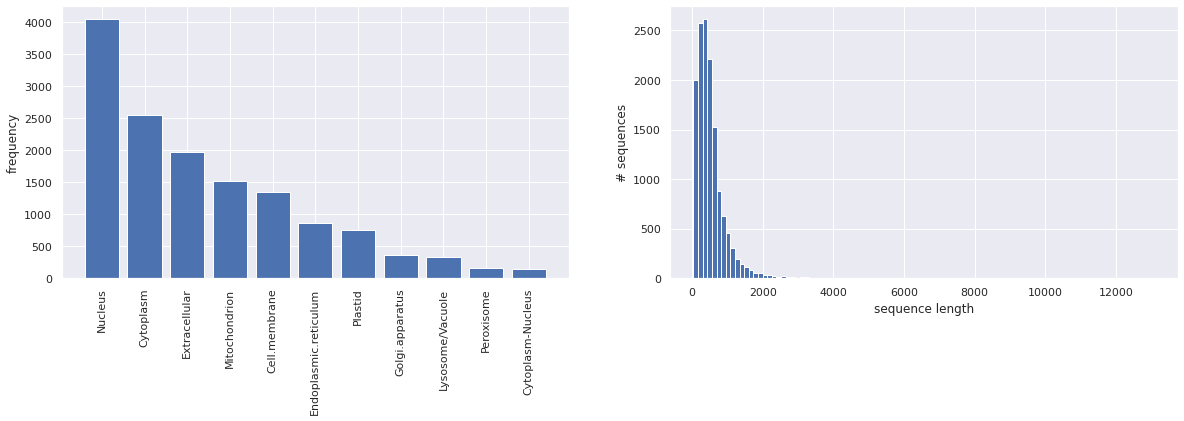

In [ ]:
from collections import Counter

# count numbers of instances per class
cnt = Counter(testing.label)
# the 11 classes!
top_classes = 11
# sort classes
sorted_classes = cnt.most_common()[:top_classes]
classes = [c[0] for c in sorted_classes]
counts = [c[1] for c in sorted_classes]
print("at least " + str(counts[-1]) + " instances per class")

# apply to dataframe
print(str(testing.shape[0]) + " instances before")
df = testing[[c in classes for c in testing.label]]
print(str(df.shape[0]) + " instances after")

seqs = testing.seq
lengths = [len(s) for s in seqs]

# visualize
fig, axarr = plt.subplots(1,2, figsize=(20,5))
axarr[0].bar(range(len(classes)), counts)
plt.sca(axarr[0])
plt.xticks(range(len(classes)), classes, rotation='vertical')
axarr[0].set_ylabel('frequency')

axarr[1].hist(lengths, bins=100)
axarr[1].set_xlabel('sequence length')
axarr[1].set_ylabel('# sequences')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(testing.label)

In [ ]:
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# maximum length of sequence, everything afterwards is discarded!
max_length = 420

#create and fit tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(seqs)
#represent input data as word rank number sequences
X = tokenizer.texts_to_sequences(seqs)
X = sequence.pad_sequences(X, maxlen=max_length)

In [ ]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution1D, Conv2D, MaxPooling1D, Flatten, Dropout
from keras.layers.embeddings import Embedding

embedding_dim = 11

# create the model

model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_length))
model.add(Convolution1D(activation="relu", 
                        input_shape=(1000, 4), 
                        padding="valid", strides=1, 
                        filters=320, kernel_size=26))

model.add(MaxPooling1D(strides=13, pool_size=13))

model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(top_classes, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 420, 11)           275       
_________________________________________________________________
conv1d (Conv1D)              (None, 395, 320)          91840     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 30, 320)           0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 320)           0         
_________________________________________________________________
flatten (Flatten)            (None, 9600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1228928   
_________________________________________________________________
dense_1 (Dense)              (None, 11)                1

Epoch 1/20
77/77 [==============================] - 54s 697ms/step - loss: 1.9915 - accuracy: 0.2942 - val_loss: 1.7804 - val_accuracy: 0.3641
Epoch 2/20
77/77 [==============================] - 53s 685ms/step - loss: 1.7321 - accuracy: 0.3920 - val_loss: 1.6820 - val_accuracy: 0.4036
Epoch 3/20
77/77 [==============================] - 53s 687ms/step - loss: 1.5792 - accuracy: 0.4605 - val_loss: 1.5751 - val_accuracy: 0.4479
Epoch 4/20
77/77 [==============================] - 53s 686ms/step - loss: 1.4668 - accuracy: 0.5016 - val_loss: 1.5152 - val_accuracy: 0.4688
Epoch 5/20
77/77 [==============================] - 53s 685ms/step - loss: 1.3750 - accuracy: 0.5320 - val_loss: 1.4769 - val_accuracy: 0.4852
Epoch 6/20
77/77 [==============================] - 53s 690ms/step - loss: 1.2290 - accuracy: 0.5920 - val_loss: 1.4528 - val_accuracy: 0.4814
Epoch 7/20
77/77 [==============================] - 53s 686ms/step - loss: 1.0757 - accuracy: 0.6519 - val_loss: 1.3987 - val_accuracy: 0.5195

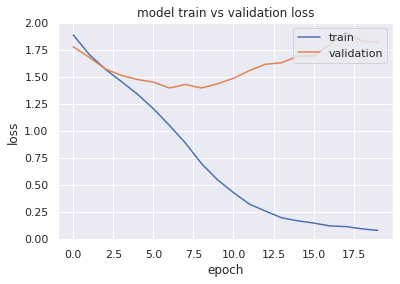

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)

#earlystopper = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)

# plot train and validation loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

train-acc = 0.9997959600081616
test-acc = 0.5604474059971443


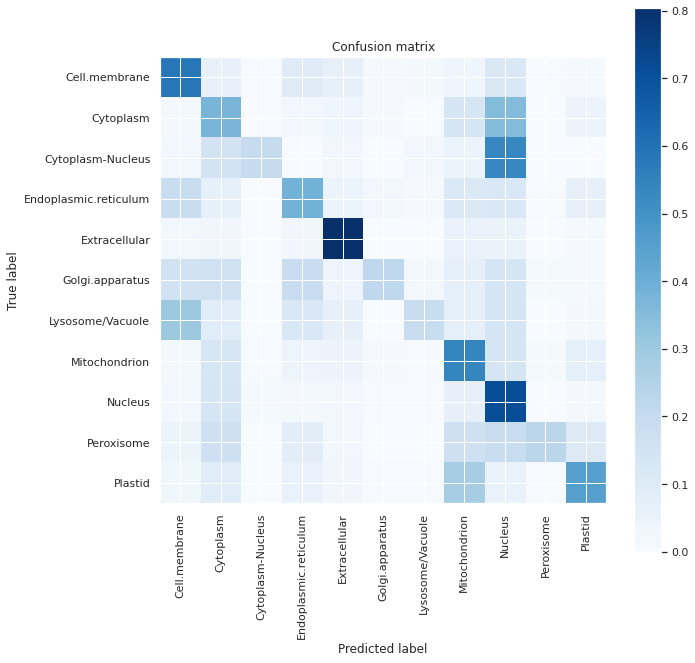

                       precision    recall  f1-score   support

        Cell.membrane       0.59      0.58      0.59       411
            Cytoplasm       0.46      0.37      0.41       769
    Cytoplasm-Nucleus       0.28      0.20      0.23        41
Endoplasmic.reticulum       0.39      0.38      0.39       263
        Extracellular       0.78      0.80      0.79       571
      Golgi.apparatus       0.47      0.21      0.29        98
     Lysosome/Vacuole       0.49      0.19      0.28       109
        Mitochondrion       0.41      0.54      0.47       446
              Nucleus       0.63      0.71      0.67      1210
           Peroxisome       0.46      0.23      0.31        48
              Plastid       0.47      0.45      0.46       236

             accuracy                           0.56      4202
            macro avg       0.49      0.42      0.44      4202
         weighted avg       0.55      0.56      0.55      4202



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))

# Bidirectional LSTM 

In [ ]:
from keras.layers import LSTM, Bidirectional

forward_lstm = LSTM(units=100, return_sequences=True)
backward_lstm = LSTM(units=320, input_dim=320, return_sequences=True, go_backwards=True)
brnn = Bidirectional(forward_lstm, backward_layer=backward_lstm)

model2 = Sequential()
model2.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_length))
model2.add(Convolution1D(activation="relu", 
                        input_shape=(1000, 4), 
                        padding="valid", strides=1, 
                        filters=320, kernel_size=26))

model2.add(MaxPooling1D(strides=13, pool_size=13))

model2.add(Dropout(0.4))

model2.add(brnn)

model2.add(Dropout(0.4))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(top_classes, activation='sigmoid'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 420, 11)           275       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 395, 320)          91840     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 30, 320)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 320)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 420)           988880    
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 420)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12600)            

Epoch 1/20
77/77 [==============================] - 99s 1s/step - loss: 1.9537 - accuracy: 0.3116 - val_loss: 1.6972 - val_accuracy: 0.4055
Epoch 2/20
77/77 [==============================] - 94s 1s/step - loss: 1.6349 - accuracy: 0.4221 - val_loss: 1.6107 - val_accuracy: 0.4417
Epoch 3/20
77/77 [==============================] - 91s 1s/step - loss: 1.5218 - accuracy: 0.4553 - val_loss: 1.4919 - val_accuracy: 0.4755
Epoch 4/20
77/77 [==============================] - 89s 1s/step - loss: 1.3978 - accuracy: 0.5015 - val_loss: 1.4282 - val_accuracy: 0.5048
Epoch 5/20
77/77 [==============================] - 89s 1s/step - loss: 1.3002 - accuracy: 0.5432 - val_loss: 1.4472 - val_accuracy: 0.5052
Epoch 6/20
77/77 [==============================] - 89s 1s/step - loss: 1.2312 - accuracy: 0.5675 - val_loss: 1.3102 - val_accuracy: 0.5386
Epoch 7/20
77/77 [==============================] - 88s 1s/step - loss: 1.0924 - accuracy: 0.6211 - val_loss: 1.3050 - val_accuracy: 0.5388
Epoch 8/20
77/77 [==

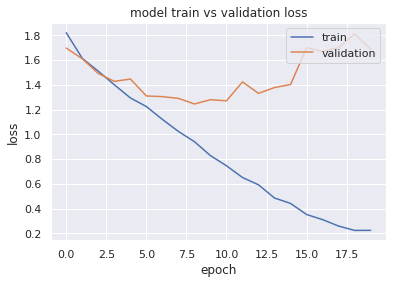

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)

# plot train and validation loss
plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

train-acc = 0.9871454805141808
test-acc = 0.6070918610185626


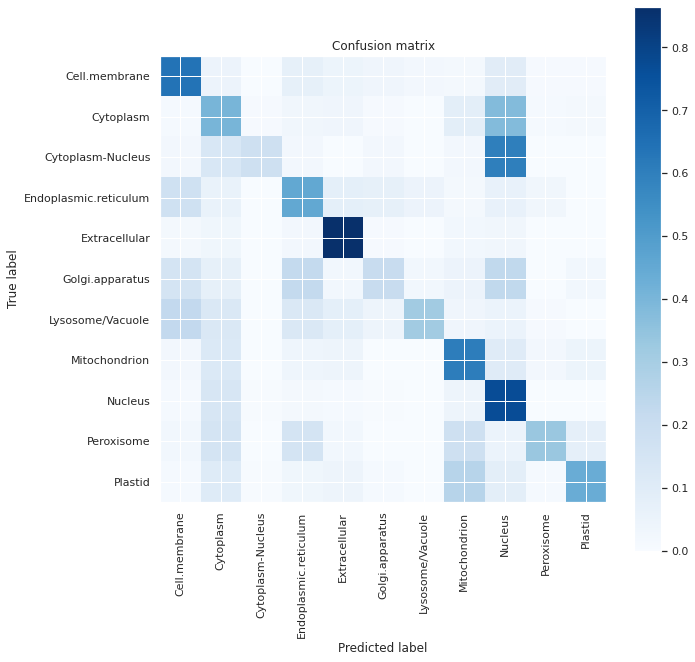

                       precision    recall  f1-score   support

        Cell.membrane       0.66      0.64      0.65       405
            Cytoplasm       0.48      0.40      0.44       754
    Cytoplasm-Nucleus       0.32      0.18      0.23        45
Endoplasmic.reticulum       0.41      0.45      0.43       238
        Extracellular       0.80      0.86      0.83       560
      Golgi.apparatus       0.30      0.20      0.24       123
     Lysosome/Vacuole       0.55      0.31      0.40       115
        Mitochondrion       0.58      0.61      0.59       493
              Nucleus       0.65      0.77      0.70      1187
           Peroxisome       0.25      0.33      0.29        39
              Plastid       0.69      0.44      0.53       243

             accuracy                           0.61      4202
            macro avg       0.52      0.47      0.48      4202
         weighted avg       0.60      0.61      0.60      4202



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model2.predict(X_train)
test_pred = model2.predict(X_test)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))

The two methods we used were 1D CNN and bidirectional LSTM. The first CNN classifier had a final validation accuracy of 0.56, a weighted average precision of 0.55, and a weighted average recall of 0.56. The “Extracellular” classification performed the best, with an F1 score of 0.79. The worst performing classification was “Cytoplasm-Nucleus”, where the F1 score was 0.23. On the other hand, the second classifier, bidirectional LSTM had an accuracy of 0.61, weighted precision of 0.60, and a weighted average recall of 0.61. Like the CNN model, the “extracellular” classification had the best performance, with an F1 score of 0.83. Overall, both classifiers struggled with correctly classifying the “Cytoplasm-Nucleus'' protein sequences. Instead, they were misclassified as “Nucleus”. The LSTM had an F1 score of 0.23 for “Cytoplasm-Nucleus”. There were only 146 protein sequences labelled as “Cytoplasm-Nucleus'', while “Cytoplasm” had over 2500 sequences, and “Nucleus” had over 4000 sequences. This could explain why both classifiers failed to correctly classify “Cytoplasm-Nucleus”. 1400 protein sequences may not provide enough training samples to train and classify 11 different protein locations and the distribution of sequences among the labels was highly skewed towards only a few dominant labels. 


Initially, we had a single LSTM without CNNs but encountered overfitting at around epoch 9+. The accuracy was 0.96 or greater while the Val. Accuracy peaked at 0.55. It was apparent that we needed to avoid overfitting. Multiple dropout layers at different cutoffs, decreasing the model’s complexity, and early stopping configuration like previous worksheets had little effect on accuracy and Val. Accuracy. Towards the end, we figured out that the limited assigned validation dataset was a reoccurring issue. Changing the Val. Test size from 0.2 to 0.3 resulted in a more efficient Val. accuracy from a limited dataset. For future reference, one can create a more representative validation dataset and pass it onto the model to improve validation accuracy.

The first CNN classifier was created as our baseline classifier and we sought to improve the accuracy by first adding a LSTM layer. The CNN + LSTM network performed only slightly better.  Unfortunately, implementing Dropout layers and early stopping did not improve the accuracy, so we increased the complexity of the network by replacing the LSTM layer with a bidirectional LSTM layer. With this change, the validation accuracy significantly improved. CNNs alone do not capture enough biological context when processing the protein sequences as CNNs are more suited towards image and speech classification. Bidirectional LSTMs are able to better utilize and capture the biological context inherent in protein sequences. Overall, the bidirectional LSTM performed better than the CNN in terms of accuracy, recall, and precision.